# Notice
### This notebook uses an experimental API to FEDEX called "pd-explain". this is not yet available.

In [16]:
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
import pandas as pd
import warnings
import pd_explain

warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 999)
pd.set_option('display.max_columns', 999)

In [12]:
####dataset initialization

# Bank Churners Dataset


**CLIENTNUM** : Client number. Unique identifier for the customer holding the account

**Attrition_Flag :** Internal event (customer activity) variable - if the account is closed then 1 else 0

**Dependent_count :** Demographic variable - Number of dependents

**Total_Relationship_Count :** Total no. of products held by the customer

**Total_Revolving_Bal :** Total Revolving Balance on the Credit Card

**Avg_Open_To_Buy :** Open to Buy Credit Line (Average of last 12 months)

**Months_on_book :** Period of relationship with bank

**Months_Inactive_12_mon :** No. of months inactive in the last 12 months

**Contacts_Count_12_mon :** No. of Contacts in the last 12 months

**Total_Amt_Chng_Q4_Q1 :** Change in Transaction Amount (Q4 over Q1)

**Total_Trans_Amt :** Total Transaction Amount (Last 12 months)

**Total_Trans_Ct :** Total Transaction Count (Last 12 months)

**Total_Ct_Chng_Q4_Q1 :** Change in Transaction Count (Q4 over Q1)

**Avg_Utilization_Ratio :** Average Card Utilization Ratio

In [3]:
credit_card_customers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Registered_Products_Count,Months_Inactive_Count_Last_Year,Contacts_Count_Last_Year,Credit_Limit,Credit_Used,Credit_Open_To_Buy,Total_Amount_Change_Q4_vs_Q1,Total_Transitions_Amount,Total_Transitions_Count,Total_Count_Change_Q4_vs_Q1,Credit_Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


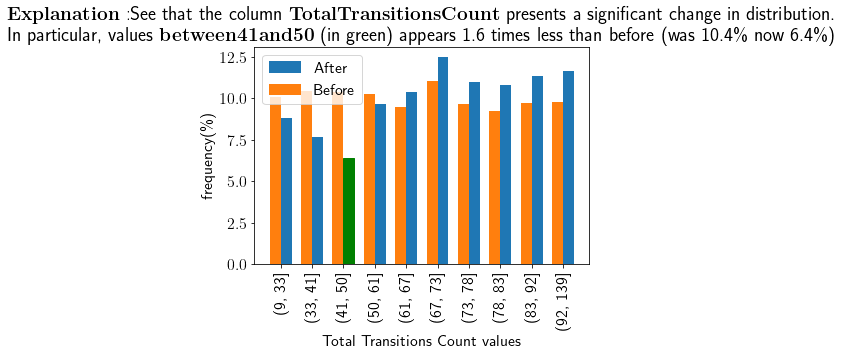

In [4]:
filter_results = credit_card_customers[credit_card_customers["Attrition_Flag"] == 'Existing Customer']
explains = filter_results.explain()


[<Figure size 432x288 with 1 Axes>]

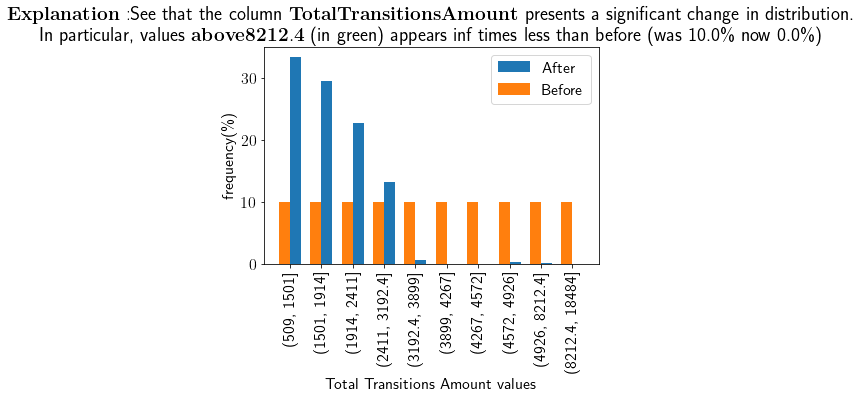

In [5]:
result = credit_card_customers[credit_card_customers.Total_Transitions_Count <50]
result.explain()

[<Figure size 432x288 with 1 Axes>]

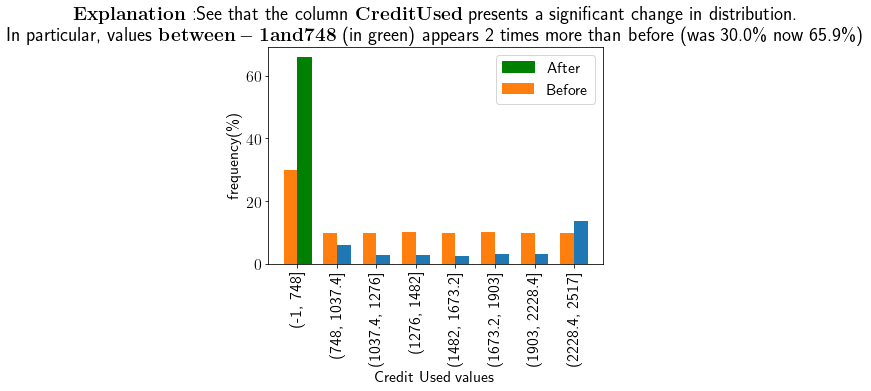

In [8]:
tmp = credit_card_customers.pop('Total_Transitions_Amount')
result = credit_card_customers[credit_card_customers["Attrition_Flag"] != 'Existing Customer']
result.explain()

[<Figure size 432x288 with 1 Axes>]

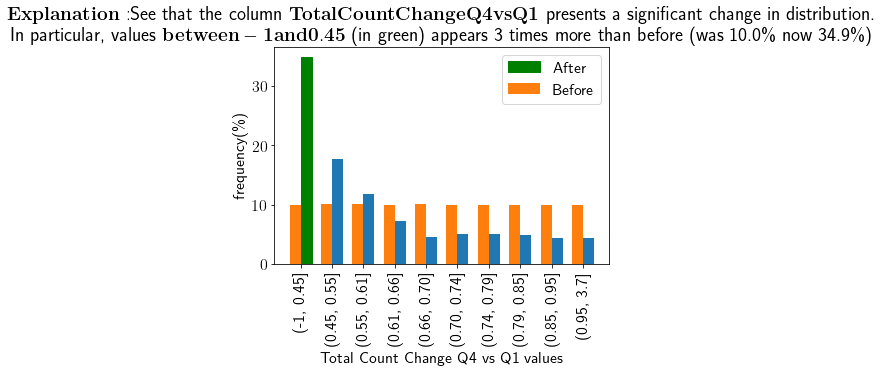

In [11]:
credit_card_customers.pop('Credit_Used')
result = credit_card_customers[credit_card_customers["Attrition_Flag"] != 'Existing Customer']
result.explain()

In [13]:
churn = credit_card_customers[credit_card_customers["Attrition_Flag"] != 'Existing Customer']
exist = credit_card_customers[credit_card_customers["Attrition_Flag"] == 'Existing Customer']

[<Figure size 864x288 with 2 Axes>]

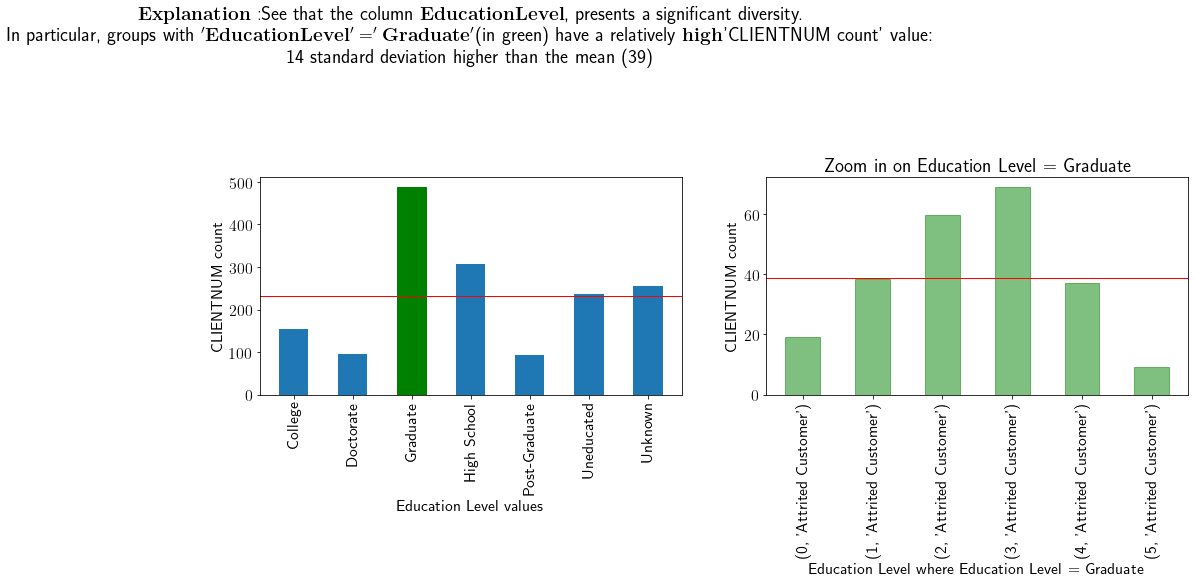

In [32]:
tmp = churn.groupby(by=['Education_Level', 'Dependent_count']).agg({'CLIENTNUM': ['count']})
tmp.explain()

[<Figure size 864x288 with 2 Axes>]

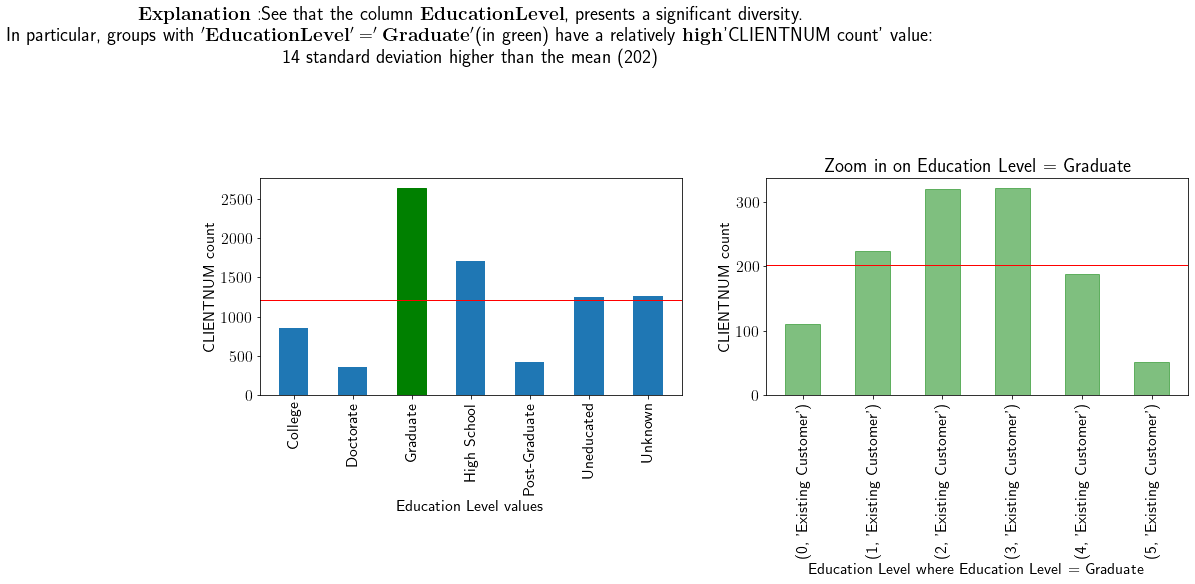

In [33]:
tmp = exist.groupby(by=['Education_Level', 'Dependent_count']).agg({'CLIENTNUM': ['count']})
tmp.explain()

[<Figure size 864x288 with 1 Axes>]

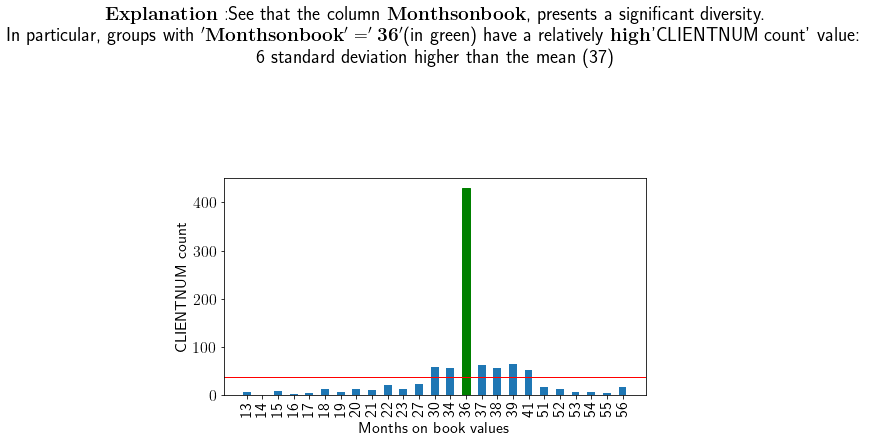

In [34]:
tmp = churn.groupby(by=['Months_on_book']).agg({'CLIENTNUM': ['count']})
tmp.explain()

[<Figure size 864x288 with 1 Axes>]

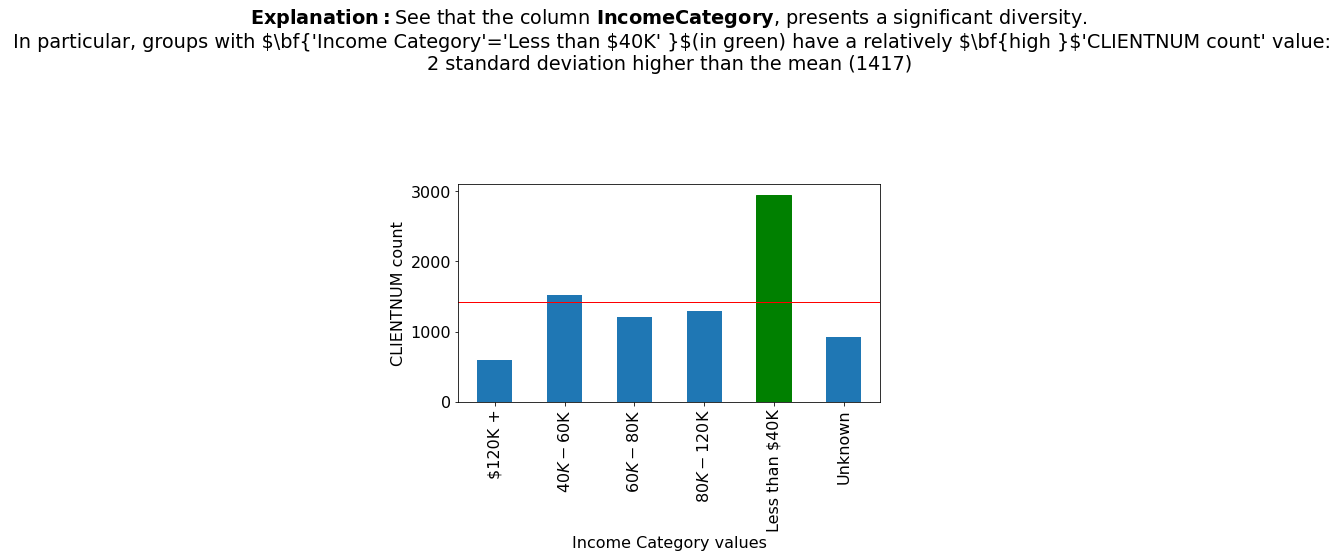

In [38]:
from matplotlib import rc

rc('text', usetex=False)

tmp = exist.groupby(by=['Income_Category']).agg({'CLIENTNUM': ['count']})
tmp.explain()

[<Figure size 864x288 with 1 Axes>]

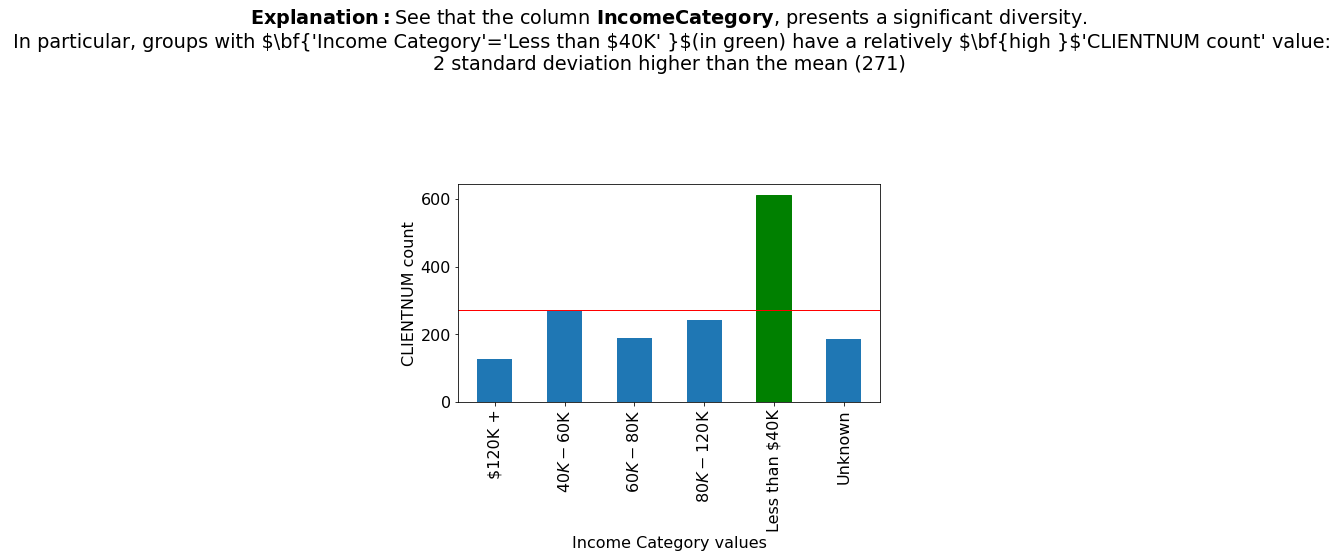

In [39]:
tmp = churn.groupby(by=['Income_Category']).agg({'CLIENTNUM': ['count']})
tmp.explain()